# Задача классификации. Алгоритм, который выдает вероятность


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')

In [ ]:
df_cut=df[['Growth','Weight','Sex','Hair length','Children number']]
df_cut=df_cut.dropna()

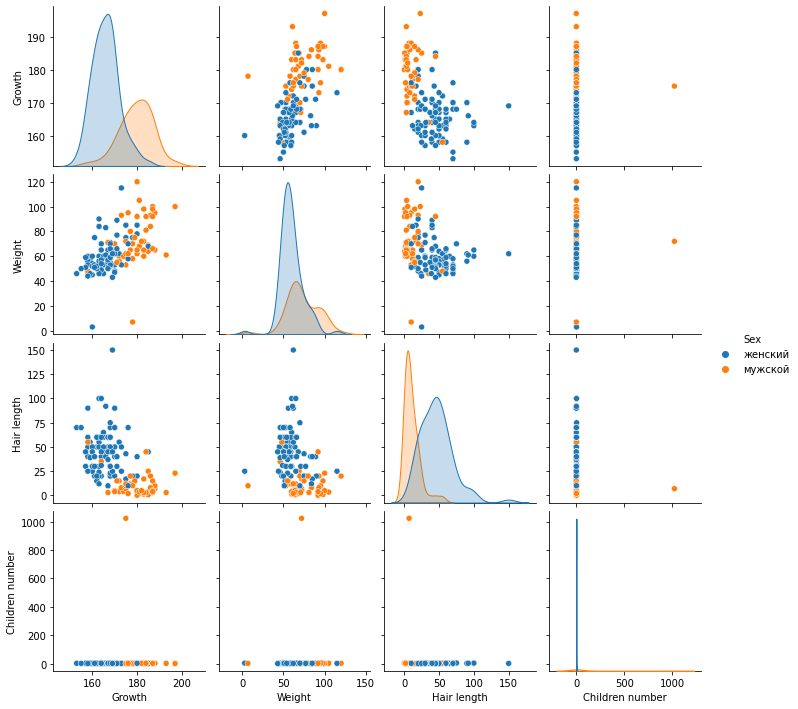

In [ ]:
sns.pairplot(df_cut, hue='Sex')

Идея: можно запустить один из известных алгоритмов, но попросить его выдать вероятности. 

In [ ]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

RandomForestClassifier(max_depth=2, random_state=0)

Загружаем тестовую выбоку

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number']]
df_test_cut=df_test_cut.dropna()

Внимание: здесь нужно вызвать функцию predict_proba, если хотите получить вероятности.

In [ ]:
result=model.predict_proba(df_test_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))
print(result) #это вероятности принадлежности классам

In [ ]:
df_test_cut['pr class 0']=result[:,0]
df_test_cut['pr class 1']=result[:,1]
df_test_cut.head()

Growth  Weight      Sex  Hair length  Children number  pr class 0  \
0   180.0    78.0  мужской          1.2              2.0    0.111984   
1   167.0    50.0  женский         30.0              2.0    0.960954   
3   156.0    47.0  женский         20.0              2.0    0.930384   
5   150.0    40.0  женский         30.0              2.0    0.954804   
7   183.0    80.0  мужской          2.0              0.0    0.072297   

   pr class 1  
0    0.888016  
1    0.039046  
3    0.069616  
5    0.045196  
7    0.927703

In [ ]:
df_test_cut[(df_test_cut['pr class 1']<0.9) & (df_test_cut['Sex']=='мужской')].head()

In [ ]:
df_test_cut.sort_values(by='pr class 1', ascending=True).head(50)

In [12]:
df_cut=df[['Growth','Weight','Sex']]
df_cut=df_cut.dropna()

In [13]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth','Weight']].values.reshape(-1,2), y=df_cut['Sex'].values)

RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex']]
df_test_cut=df_test_cut.dropna()

In [15]:
result=model.predict_proba(df_test_cut[['Growth','Weight']].values.reshape(-1,2))

In [16]:
df_test_cut['pr class 0']=result[:,0]
df_test_cut['pr class 1']=result[:,1]
df_test_cut.head()

Growth  Weight      Sex  pr class 0  pr class 1
0   180.0    78.0  мужской    0.222825    0.777175
1   167.0    50.0  женский    0.939084    0.060916
2   178.0    70.0  женский    0.233356    0.766644
3   156.0    47.0  женский    0.929445    0.070555
4   186.0    94.0  мужской    0.085050    0.914950

In [21]:
df_test_cut.sort_values(by='pr class 0', ascending=False).head(50)

Growth  Weight      Sex  pr class 0  pr class 1
61   162.0    49.0  женский    0.943150    0.056850
79   162.0    49.0  женский    0.943150    0.056850
17   159.0    49.0  женский    0.943150    0.056850
52   160.0    50.0  женский    0.943080    0.056920
39   157.0    49.0  женский    0.941509    0.058491
64   157.0    50.0  женский    0.941439    0.058561
88   158.0    50.0  женский    0.941439    0.058561
73   166.0    50.5  женский    0.940339    0.059661
51   164.0    54.0  женский    0.940339    0.059661
19   165.0    50.0  женский    0.940339    0.059661
65   165.0    51.0  женский    0.940339    0.059661
1    167.0    50.0  женский    0.939084    0.060916
62   168.0    52.0  женский    0.939084    0.060916
41   168.0    50.0  женский    0.939084    0.060916
24   161.0    48.0  женский    0.931086    0.068914
3    156.0    47.0  женский    0.929445    0.070555
9    155.0    47.0  женский    0.929445    0.070555
72   161.0    46.0  женский    0.927086    0.072914
42   161.0    55.0  женский    0.925756    0.074244
5    150.0    40.0  женский    0.925445    0.074555
67   155.5    46.0  женский    0.925445    0.074555
55   165.0    55.0  женский    0.923015    0.076985
8    157.0    56.0  женский    0.921869    0.078131
30   168.0    55.0  женский    0.921760    0.078240
37   167.0    55.0  женский    0.921760    0.078240
68   164.0    56.0  женский    0.920769    0.079231
20   165.0    57.0  женский    0.920769    0.079231
50   164.0    59.0  женский    0.917564    0.082436
58   169.0    59.0  женский    0.870546    0.129454
96   168.0    60.0  женский    0.840835    0.159165
43   170.0    55.0  женский    0.833688    0.166312
70   165.0    61.0  женский    0.826575    0.173425
40   156.0    63.0  женский    0.798722    0.201278
94   168.0    67.0  женский    0.787897    0.212103
35   156.0    75.0  женский    0.755154    0.244846
31   164.0    72.0  женский    0.751401    0.248599
74   170.0    60.0  женский    0.745138    0.254862
53   169.0    65.5  женский    0.728339    0.271661
63   171.0    52.0  женский    0.697004    0.302996
92   171.0    47.0  женский    0.695205    0.304795
71   172.0    57.0  женский    0.532165    0.467835
84   173.0    67.0  мужской    0.446590    0.553410
11   173.0    70.0  мужской    0.433846    0.566154
78   175.0    50.0  мужской    0.396895    0.603105
15   176.0    52.0  женский    0.393631    0.606369
86   174.0    57.0  женский    0.390589    0.609411
56   175.0    71.0  мужской    0.324340    0.675660
32   176.0    64.0  женский    0.289357    0.710643
14   178.0    60.0  женский    0.276697    0.723303
22   180.0    62.0  мужской    0.240440    0.759560